# Problem Statement

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, My job as a Data analyst is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I need to suggest the countries which the CEO needs to focus on the most.

# About organization
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

# Objective
The project aims to use clustering techniques to categorize countries based on socio-economic and health factors, helping the CEO of an NGO determine which countries are in the greatest need of aid out of a $10 million budget. The analysis also involves assessing the clusters and grouping the countries into developed, developing, and undeveloped categories.


## Data Description

* country: Name of the country
* child_mort: Death of children under 5 years of age per 1000 live births
* exports: Exports of goods and services. Given as %age of the Total GDP
* health: Total health spending as %age of Total GDP
* imports: Imports of goods and services. Given as %age of the Total GDP
* Income: Net income per person
* Inflation: The measurement of the annual growth rate of the Total GDP
* life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [1]:
# import the required libraries 

import pandas as pd # for data manipulation 
import numpy as np # for arithmetic and mathematical operations
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns# for visualization
import warnings # To supress warning
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # for preprocessing data(scaling)
from sklearn.decomposition import PCA # for applying PCA
from sklearn.cluster import KMeans # for applying K-Means++
from sklearn.metrics import silhouette_score, silhouette_samples # To find silhouette score
from sklearn.cluster import AgglomerativeClustering # for applying agglomerative heirarchical clustering
from scipy.cluster.hierarchy import linkage # for applying different linkage methods of heirarchical clustering
from scipy.cluster.hierarchy import dendrogram # for visualizing dendogram of heirarchical clustering
from sklearn.cluster import DBSCAN # for applying DBSCAN

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\Country-Data\country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


### Data insights:-

1) In countries where child mortality is high, life expectancy of people is less.


2) In countries where child mortality is high, total fertility rate is high.


3) In countries where income of people are high, gdpp of that countries are high.

In [6]:
df.describe(percentiles = [.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Checking for outliers in data.

<AxesSubplot:>

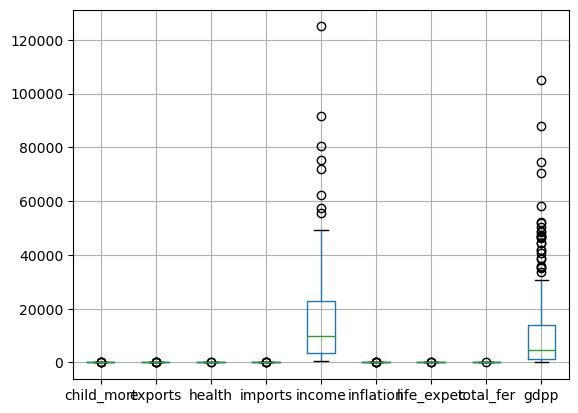

In [7]:
df.boxplot()

Income and gdpp column contains outliers

### As for the given problem statement I used clustering to group the countries.First I apply clustering on original data, if results are not good, then I go for PCA because data contains outliers, PCA can deal with it. 

In [8]:
df1 = df.drop('country', axis = 1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# Scaling the numerical data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df1)

scaled_data[5,:5]

array([-0.5911773 , -0.81262812,  0.46896621, -1.27978703,  0.0809204 ])

### Visulaizatng Original Data with the help of PCA.

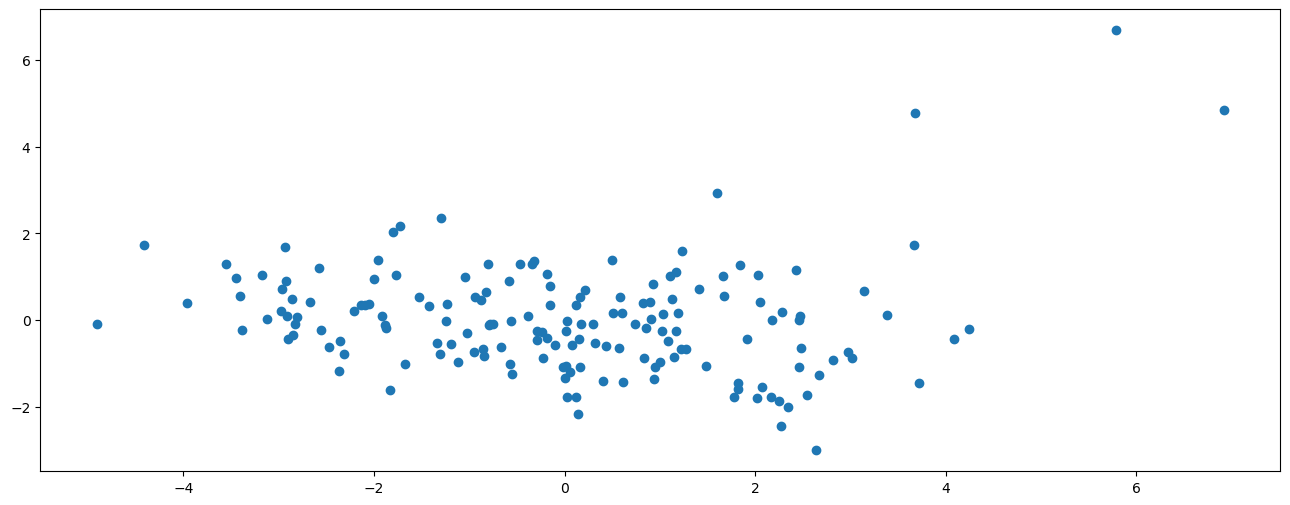

In [10]:
#Perform PCA to visualize data

pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
fig = plt.figure(figsize = (16,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.show()

### Check the silhouette Score for Original and Scaled Data

For n_clusters = 2, the average silhouette score is 0.726
For n_clusters = 3, the average silhouette score is 0.700
For n_clusters = 4, the average silhouette score is 0.611
For n_clusters = 5, the average silhouette score is 0.573
For n_clusters = 6, the average silhouette score is 0.590
For n_clusters = 7, the average silhouette score is 0.594
For n_clusters = 8, the average silhouette score is 0.596
For n_clusters = 9, the average silhouette score is 0.552
For n_clusters = 10, the average silhouette score is 0.561


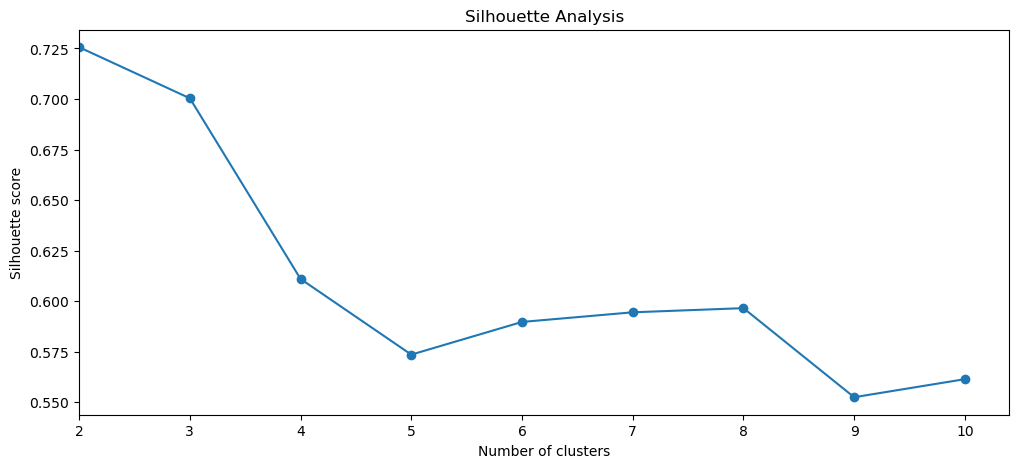

In [11]:
# Average Silhouette Score for original data without scaling

# Range of number of clusters to try
range_n_clusters = range(2, 11)

# Compute silhouette scores
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")
    
# Plot silhouette scores as a line plot

fig = plt.figure(figsize=(12, 5)) # (width, height)
plt.plot(range_n_clusters, silhouette_scores, '-o')
plt.xlim(left=2)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis")
plt.show()

### The above graph of original data shows that silhoutte score for K = 2 & 3 are more and these are the correct optimal number of clusters.

For n_clusters = 2, the average silhouette score is 0.287
For n_clusters = 3, the average silhouette score is 0.283
For n_clusters = 4, the average silhouette score is 0.301
For n_clusters = 5, the average silhouette score is 0.299
For n_clusters = 6, the average silhouette score is 0.235
For n_clusters = 7, the average silhouette score is 0.249
For n_clusters = 8, the average silhouette score is 0.241
For n_clusters = 9, the average silhouette score is 0.203
For n_clusters = 10, the average silhouette score is 0.219


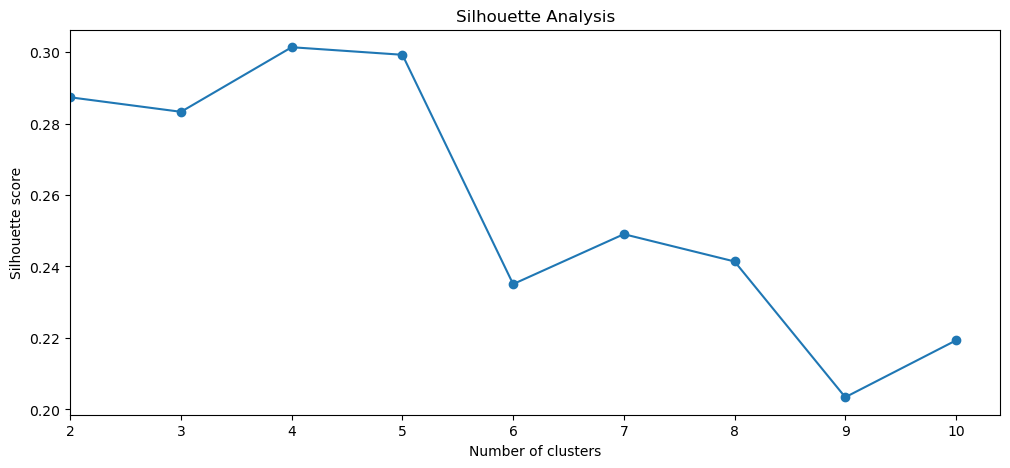

In [12]:
# Average Silhouette Score for scaled data

# Range of number of clusters to try
range_n_clusters = range(2, 11)

# Compute silhouette scores
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")
    
# Plot silhouette scores as a line plot

fig = plt.figure(figsize=(12, 5)) # (width, height)
plt.plot(range_n_clusters, silhouette_scores, '-o')
plt.xlim(left=2)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis")
plt.show()

### The above graph of scaled data shows that K= 3 & 4 are correct optimal number of clusters.

### Conclusion:- I perform trail & error to check whether clusters with original data are good or cluster  with scaled data are good.

### Plot the Scree Plot of Elbow MEthod (Original Data & Scaled Data) 

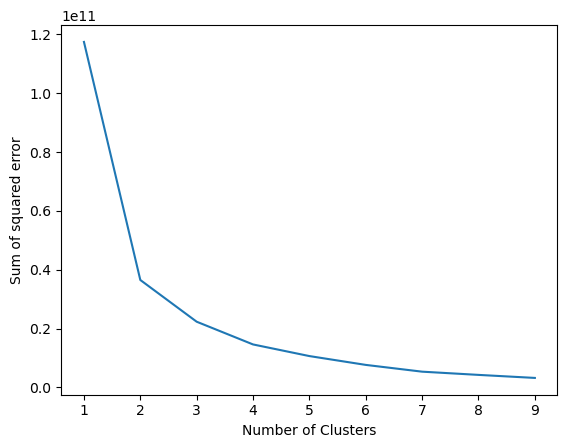

In [13]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1)
    wcss.append(km.inertia_)
    
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,wcss)

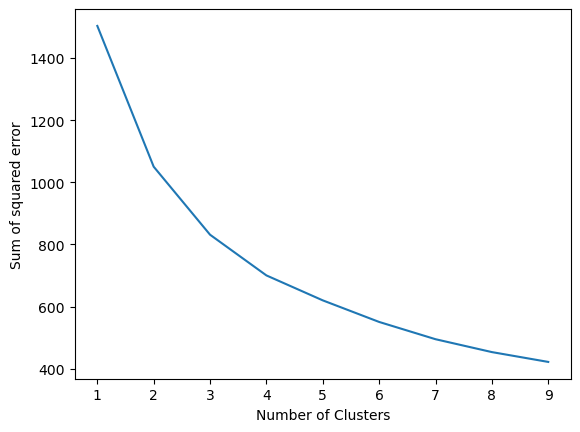

In [14]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    wcss.append(km.inertia_)
    
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,wcss)

### The above Scree Plots of Original Data and scaled data not shows the correct optimal number of clusters.

### Conclusion:- I perform Trail & Error with original and scaled data to check which data makes better clusters by appyling various algorithms.

# K-Means++

### Try with K=2 with original data.

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
clusters=kmeans.labels_

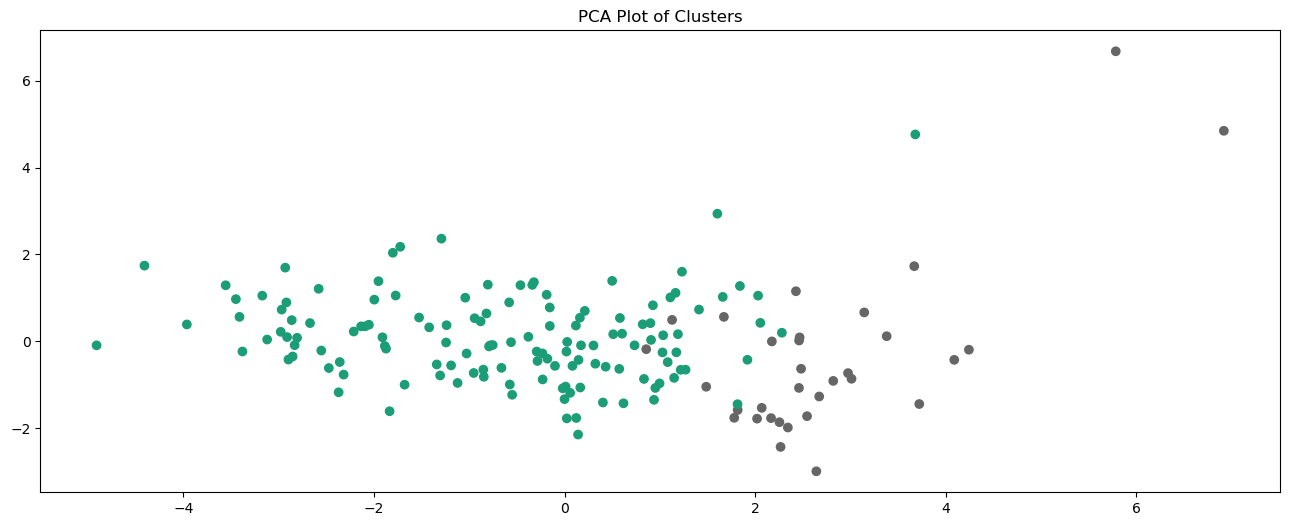

In [16]:
# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
fig = plt.figure(figsize = (16,6))
cmap = 'Dark2'
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap = cmap)
plt.title('PCA Plot of Clusters')
plt.show()

### Try K = 2 with scaled data

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
clusters=kmeans.labels_

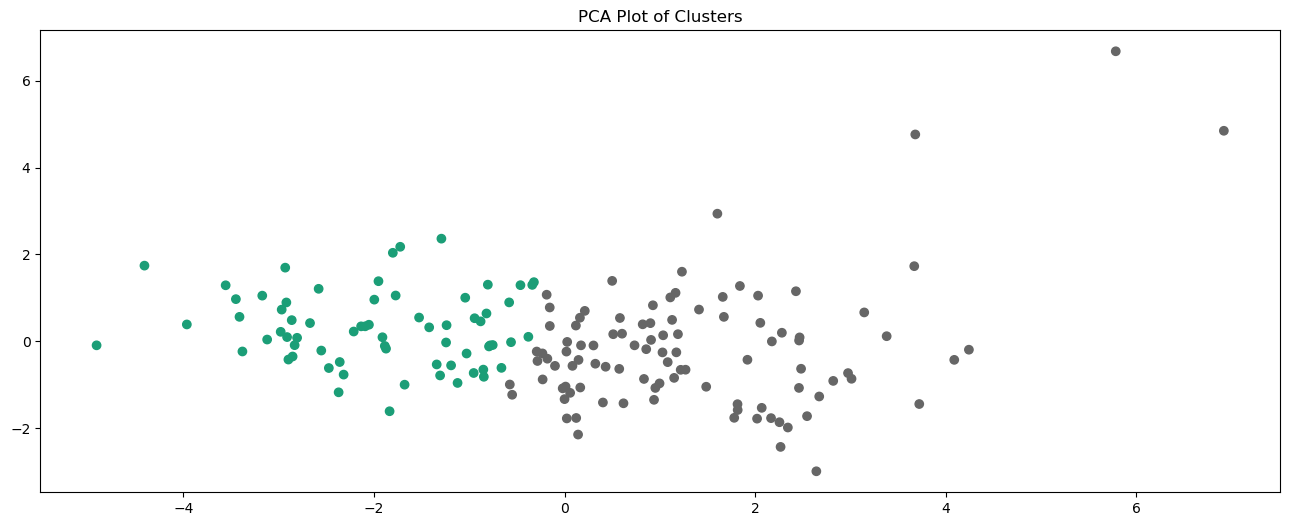

In [18]:
# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
fig = plt.figure(figsize = (16,6))
cmap = 'Dark2'
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap = cmap)
plt.title('PCA Plot of Clusters')
plt.show()

### Try with K=3 with original data

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)
clusters=kmeans.labels_

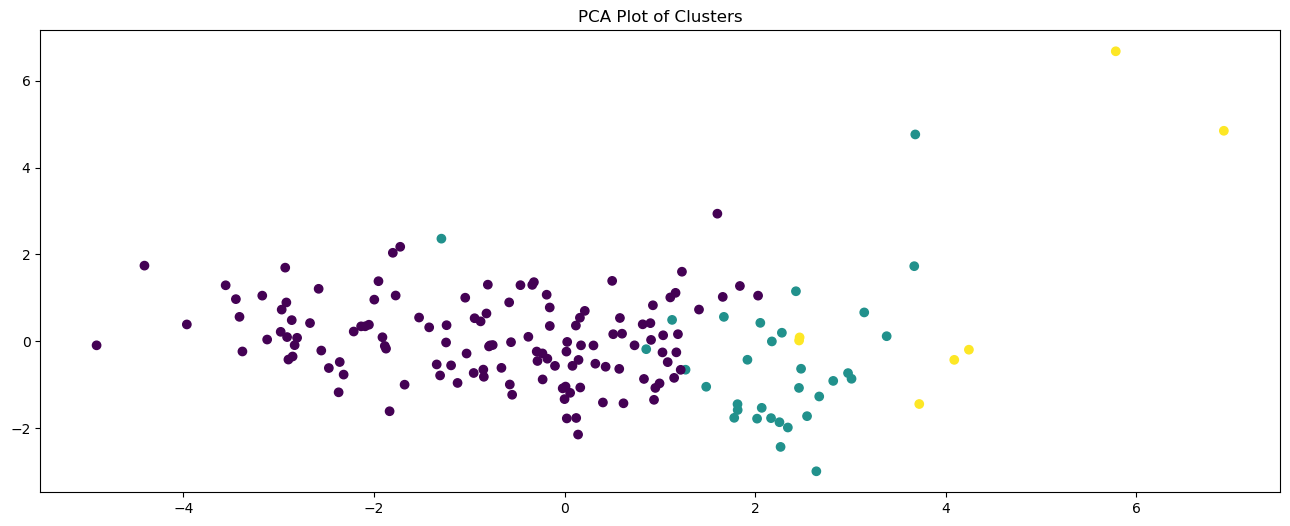

In [20]:
# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
fig = plt.figure(figsize = (16,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('PCA Plot of Clusters')
plt.show()

### Try K = 3 with scaled data

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
clusters=kmeans.labels_

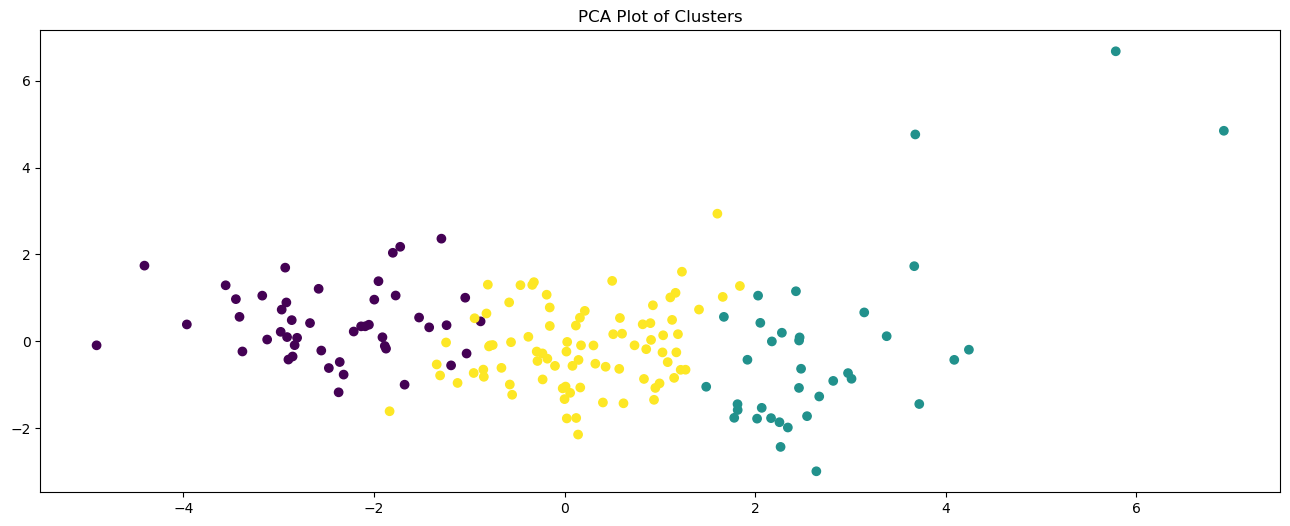

In [22]:
# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
fig = plt.figure(figsize = (16,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('PCA Plot of Clusters')
plt.show()

### Try with K = 4

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df1)
clusters=kmeans.labels_

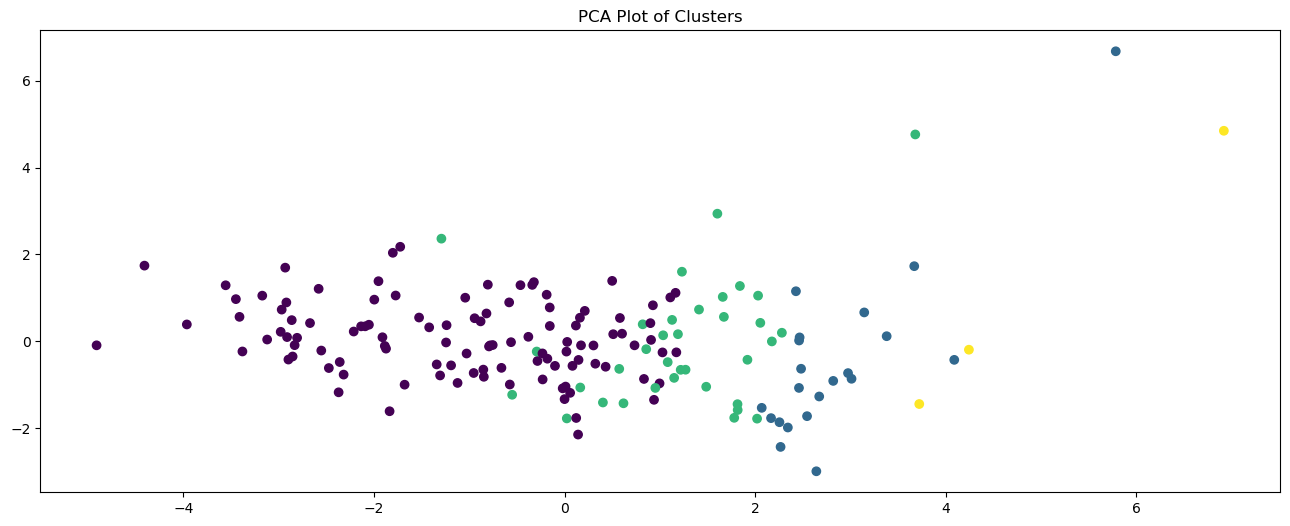

In [24]:
# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
fig = plt.figure(figsize = (16,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('PCA Plot of Clusters')
plt.show()

### Try K = 4 with scaled data

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)
clusters=kmeans.labels_

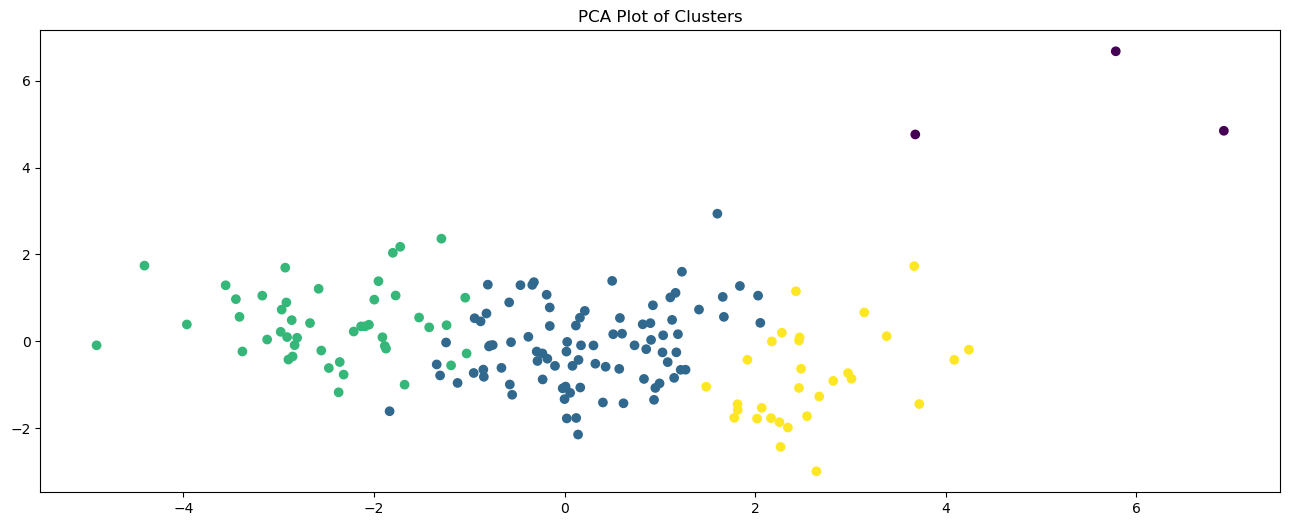

In [26]:
# Create a scatter plot of the clusters
# create a scatter plot of the data points colored by cluster
fig = plt.figure(figsize = (16,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('PCA Plot of Clusters')
plt.show()

### Conclusion:- Scaled Data makes better clusters than original data with K = 2 & 3 but our K-Means++ not give the desired results so I makes clusters again with PCA.

In [27]:
pca = PCA(random_state=42)
pca.fit(scaled_data)

PCA(random_state=42)

In [28]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

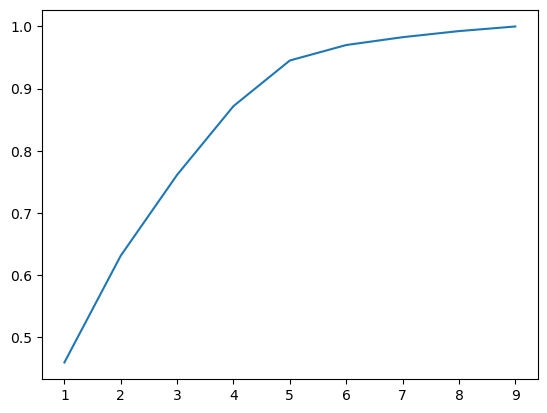

In [29]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1),var_cumu)

### As we see approx 96% of variance is explained by 6 Principal components. So, I go with 6 PC's.

In [30]:
pca = PCA(n_components=6, random_state=42)
new_df = pca.fit_transform(scaled_data)
new_df

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004,
        -0.25459744],
       [ 0.42991133, -0.58815567, -0.3334855 , -1.16105859,  0.17467732,
         0.08457863],
       [-0.28522508, -0.45517441,  1.22150481, -0.8681145 ,  0.15647465,
        -0.4016955 ],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, -1.07409791,  1.17608067,
         0.05160677],
       [-1.88745106, -0.10945301,  1.10975159,  0.05625677,  0.61836532,
        -0.54091719],
       [-2.86406392,  0.48599799,  0.22316658,  0.81636436, -0.27406773,
         0.20137816]])

In [31]:
pca_data = pd.DataFrame(new_df, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

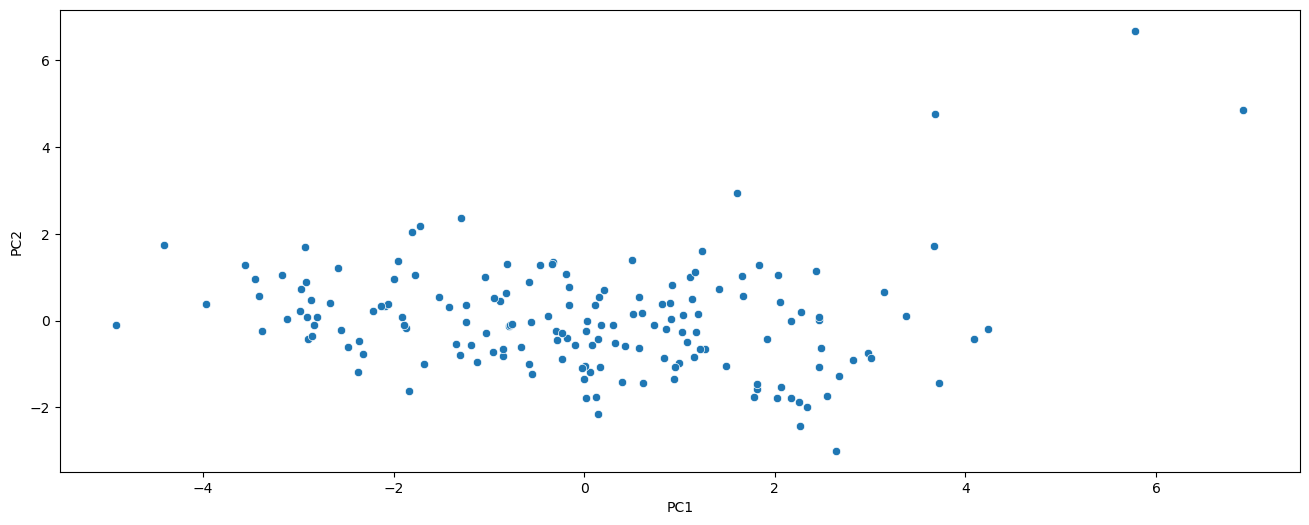

In [32]:
# Visualize the data created by PCA.

fig = plt.figure(figsize = (16,6))
cmap = 'Dark2'
sns.scatterplot(x='PC1', y='PC2',data=pca_data, cmap = cmap)

For n_clusters = 2, the average silhouette score is 0.296
For n_clusters = 3, the average silhouette score is 0.297
For n_clusters = 4, the average silhouette score is 0.315
For n_clusters = 5, the average silhouette score is 0.314
For n_clusters = 6, the average silhouette score is 0.249
For n_clusters = 7, the average silhouette score is 0.244
For n_clusters = 8, the average silhouette score is 0.238
For n_clusters = 9, the average silhouette score is 0.234
For n_clusters = 10, the average silhouette score is 0.233


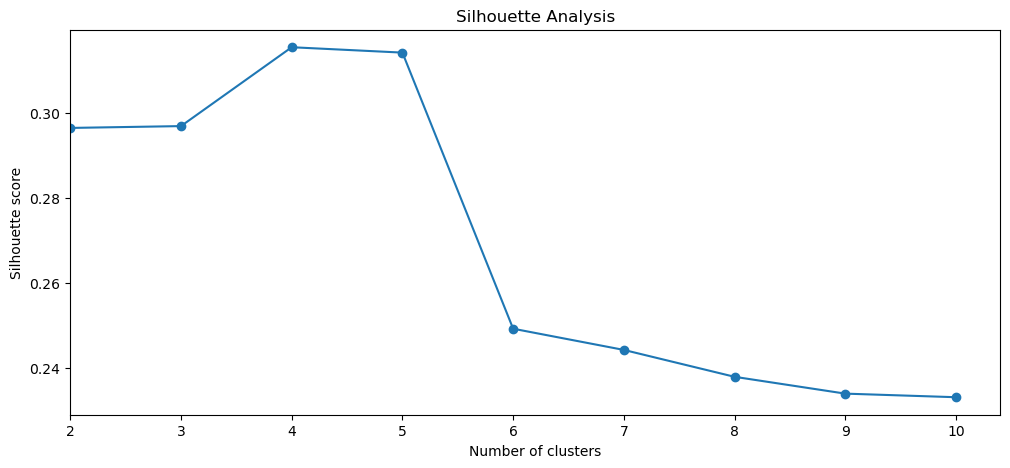

In [33]:
# Average Silhouette Score for pca data

# Range of number of clusters to try
range_n_clusters = range(2, 11)

# Compute silhouette scores
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.3f}")
    
# Plot silhouette scores as a line plot

fig = plt.figure(figsize=(12, 5)) # (width, height)
plt.plot(range_n_clusters, silhouette_scores, '-o')
plt.xlim(left=2)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis")
plt.show()

### Here we see that number of 4 clusters are best option.

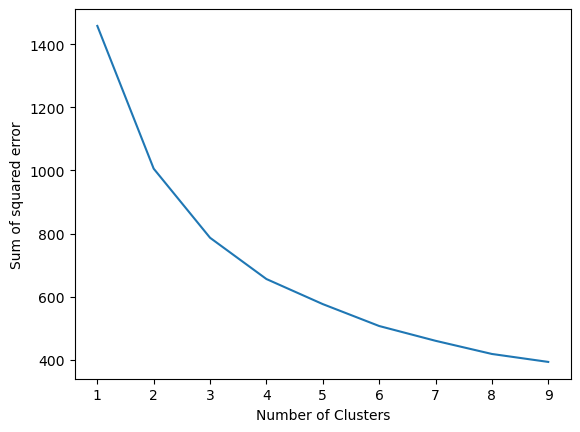

In [34]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(pca_data)
    wcss.append(km.inertia_)
    
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,wcss)

### K=2

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_data)
clusters=kmeans.labels_

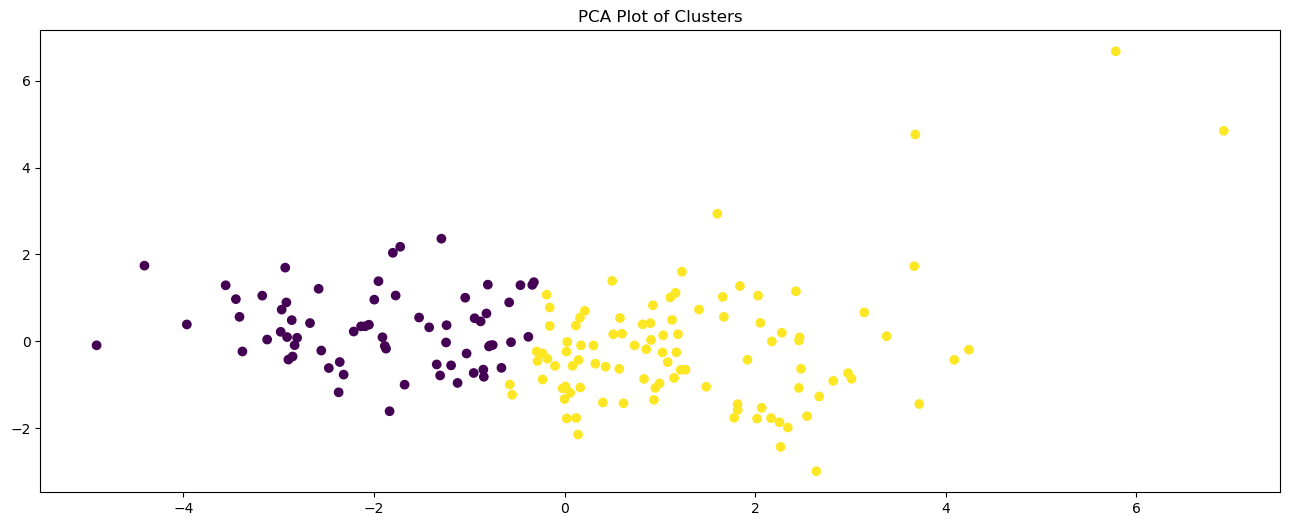

In [36]:
fig = plt.figure(figsize = (16,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.title('PCA Plot of Clusters')
plt.show()

### K=3

In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
clusters=kmeans.labels_

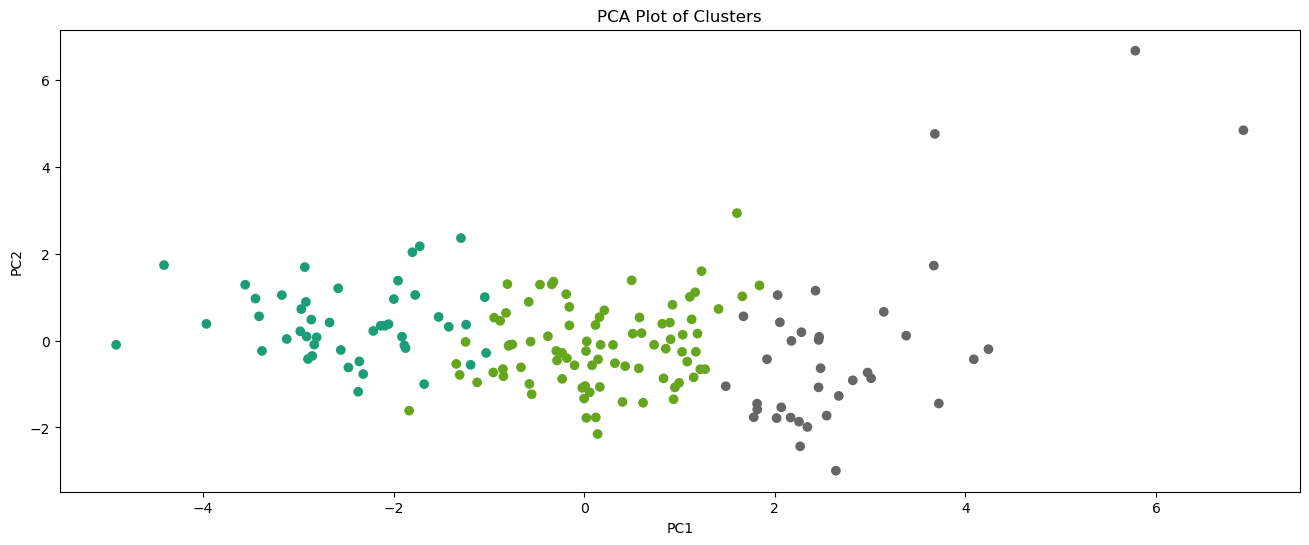

In [38]:
fig = plt.figure(figsize=(16,6))
cmap = 'Dark2'
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=kmeans.labels_, cmap = cmap)
plt.title('PCA Plot of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### K=4

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_data)
clusters=kmeans.labels_

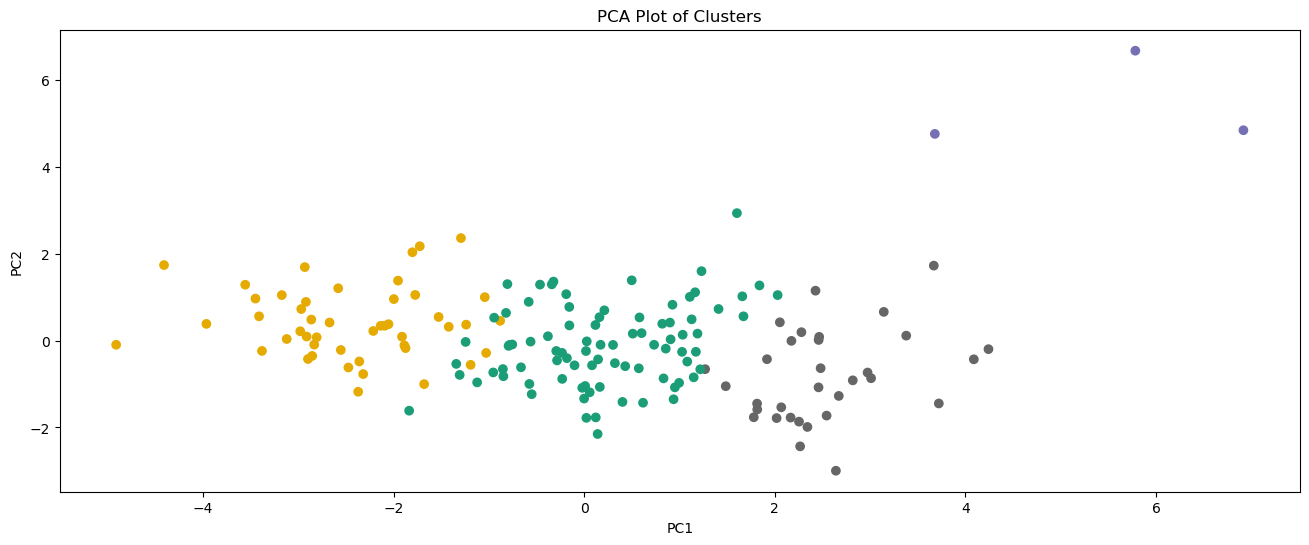

In [40]:
fig = plt.figure(figsize=(16,6))
cmap = 'Dark2'
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=kmeans.labels_, cmap = cmap)
plt.title('PCA Plot of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Final Conclusion: We perform trail and error on many approaches like clustering with original data, clustering with scaled data, clustering with PCA. My final decision is to select clusters with PCA and K=3, because it gives better results among all approaches. Now apply other clustering techniques for trail and error and check which clustering algorithms makes better clusters.

# HIERARCHICAL CLUSTERING (AGGLOMERATIVE)

## 1) Single Linkage(min)

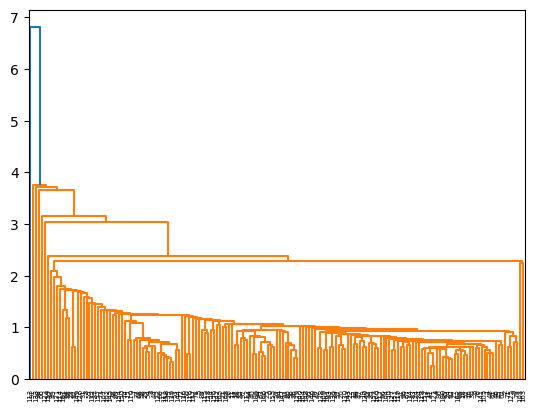

In [41]:
mergings = linkage(pca_data, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [42]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels =cluster.fit_predict(pca_data)

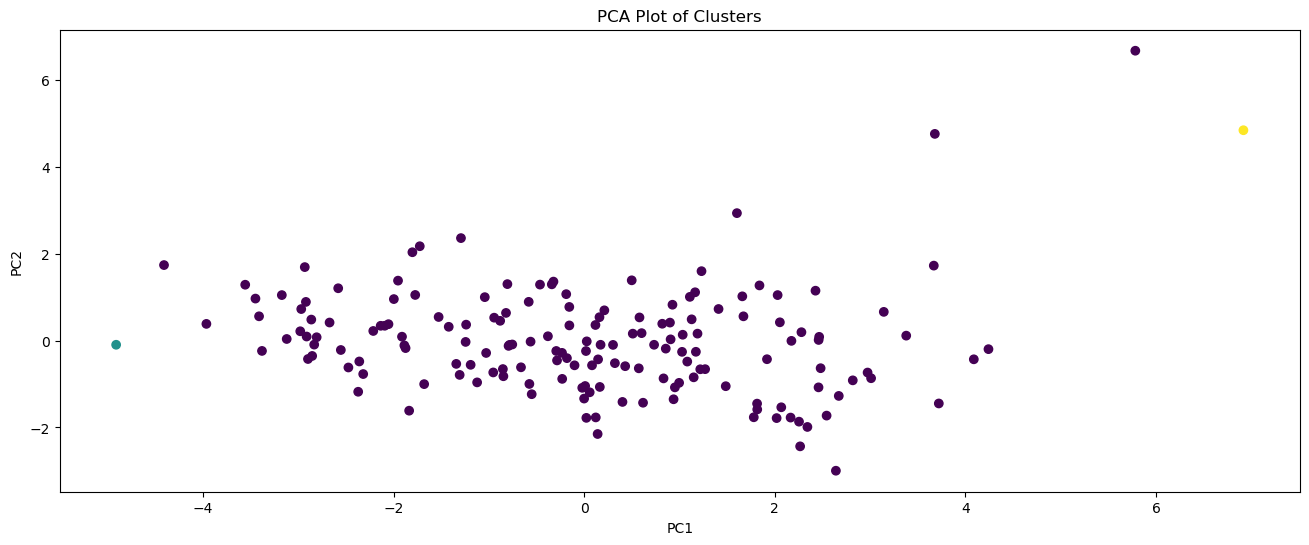

In [43]:
fig = plt.figure(figsize=(16,6))
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels)
plt.title('PCA Plot of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 2) Complete Linkage(max)

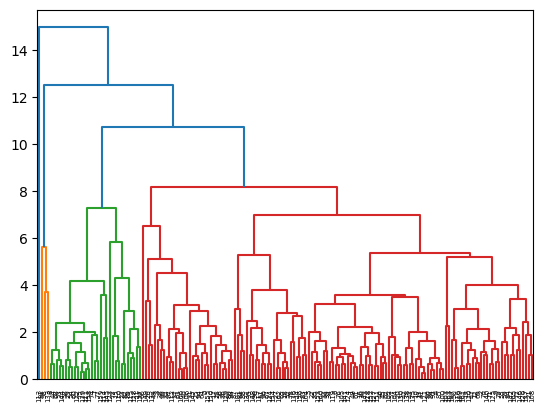

In [44]:
mergings = linkage(pca_data, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [45]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels =cluster.fit_predict(pca_data)

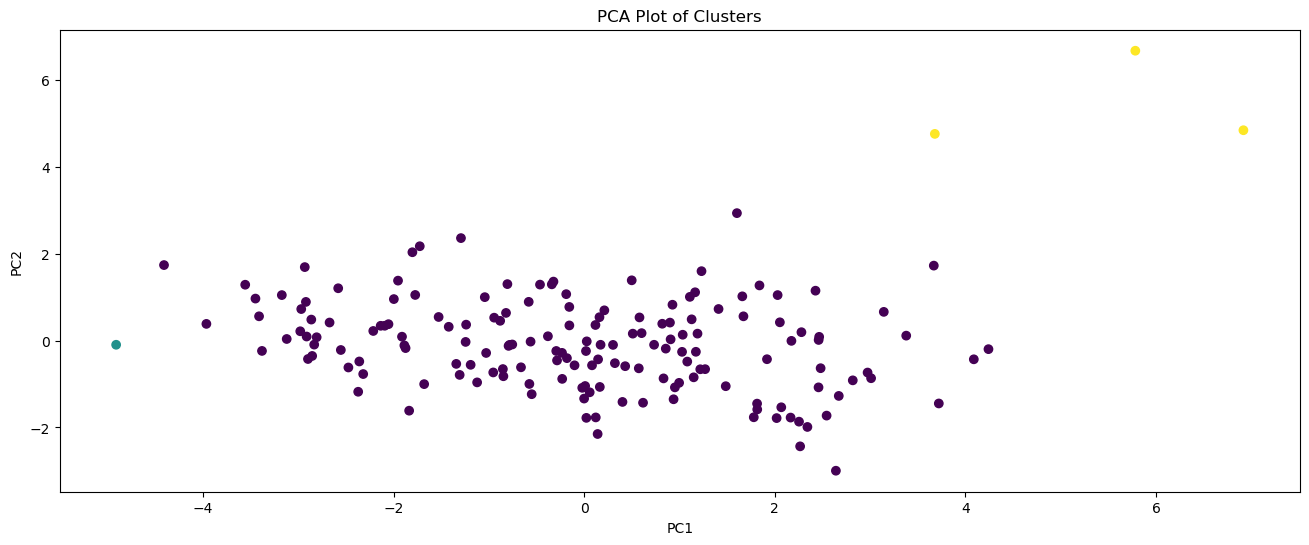

In [46]:
fig = plt.figure(figsize=(16,6))
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels)
plt.title('PCA Plot of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 3) Average Linkage

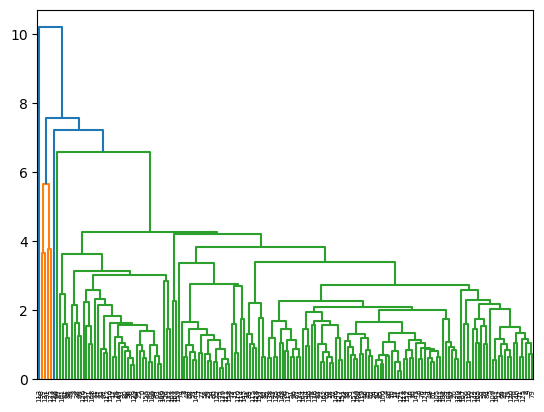

In [47]:
mergings = linkage(pca_data, method = 'average', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [48]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels =cluster.fit_predict(pca_data)

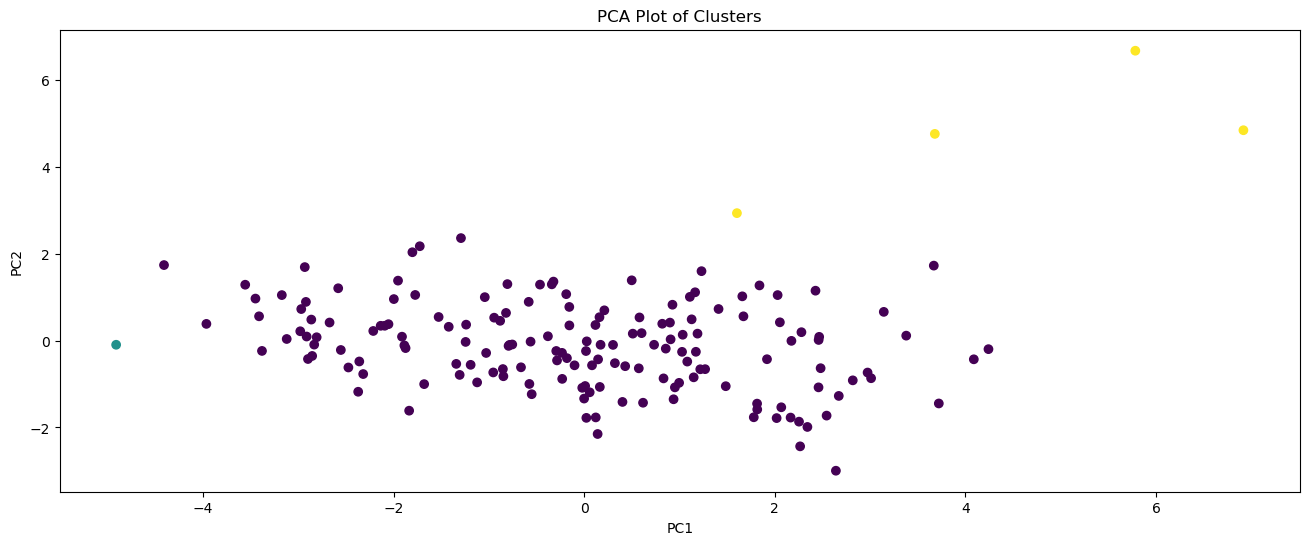

In [49]:
fig = plt.figure(figsize=(16,6))
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels)
plt.title('PCA Plot of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 4)Ward Linkage

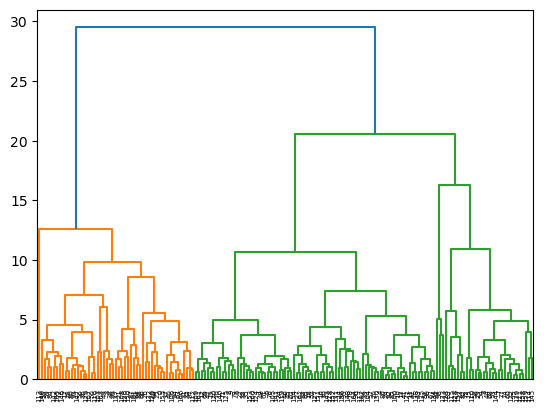

In [50]:
mergings = linkage(pca_data, method = 'ward', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [51]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels =cluster.fit_predict(pca_data)

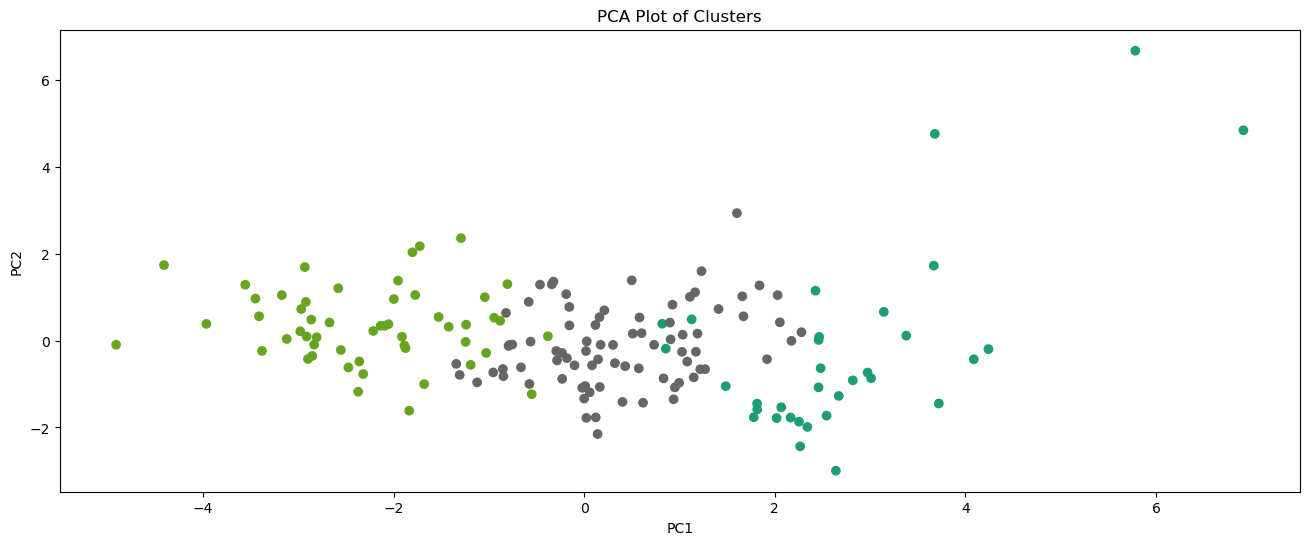

In [52]:
fig = plt.figure(figsize=(16,6))
cmap = 'Dark2'
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels, cmap=cmap)
plt.title('PCA Plot of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Clusters made by Agglomerative Heirarchical Clustering are not so good. We do trail and error with DBSCAN now. 

# DBSCAN

In [53]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,100): # check 100 values of epsilon with equal distance between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=12) # I choose min_samples as 12 which is double of our features
    dbscan.fit(pca_data)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

### Scree Plot of Epsilon Value against the Percentage of Points Classified as Outliers to determine the appropriate epsilon value.

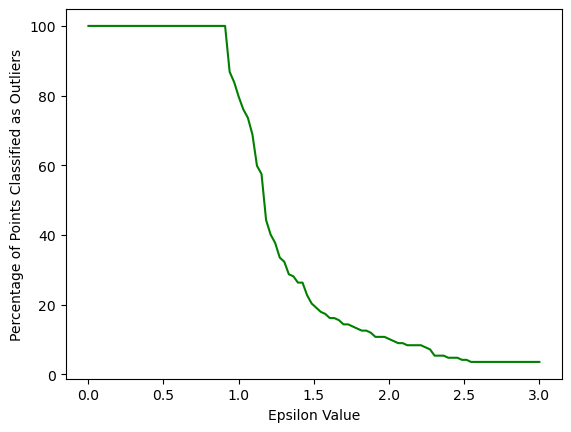

In [54]:
sns.lineplot(x=np.linspace(0.001,3,100),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

The 'elbow' forms somewhere around epsilon = 2.3

In [55]:
dbscan = DBSCAN(eps=2.3,min_samples=12)
dbscan.fit(pca_data)

DBSCAN(eps=2.3, min_samples=12)

In [56]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0],
      dtype=int64)

### This approach makes only 1 cluster and remaining data points are consider as noise. Let's try to find epsilon value and min_sample by another approach.

### Scree Plot of Epsilon Value against the Silhouette Score to determine the appropriate epsilon value. It will tells the highest silhouette score for appropriate value of epsilon.

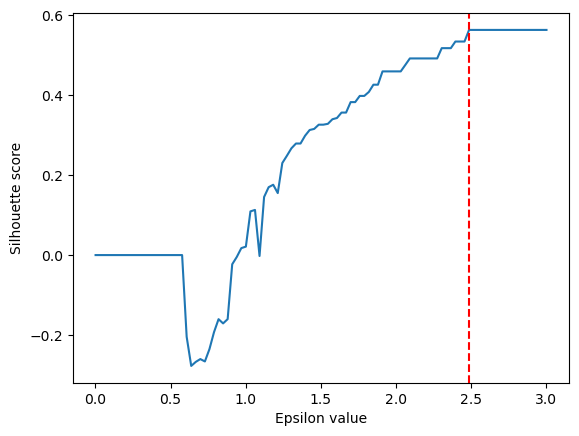

Optimal epsilon value: 2.485020202020202
Optimal silhouette score: 0.5632502966739391


In [57]:
# Define a range of epsilon values to try
eps_range = np.linspace(0.001, 3, 100)

# Initialize arrays to store the silhouette scores for each epsilon value
silhouette_scores = np.zeros_like(eps_range)

# Loop over the epsilon values and compute the silhouette scores for each
for i, eps in enumerate(eps_range):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(pca_data)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        silhouette_scores[i] = silhouette_score(pca_data, labels)

# Find the index of the maximum silhouette score and corresponding optimal epsilon value
optimal_index = np.argmax(silhouette_scores)
optimal_eps = eps_range[optimal_index]
optimal_score = silhouette_scores[optimal_index]

# Plot the scree of the silhouette scores
plt.plot(eps_range, silhouette_scores)
plt.xlabel("Epsilon value")
plt.ylabel("Silhouette score")
plt.axvline(x=optimal_eps, color='r', linestyle='--')
plt.show()

print("Optimal epsilon value:", optimal_eps)
print("Optimal silhouette score:", optimal_score)

### We have found the correct epsilon value, next step is to find the optimal value for min_samples

### Scree Plot of minimum points against the Silhouette Score to determine the appropriate min_samples value.

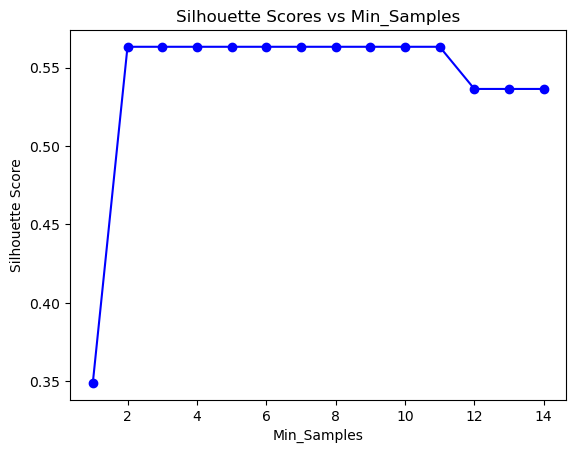

In [58]:
# range of min_samples values to evaluate
min_samples_range = range(1, 15)

# calculate silhouette score for different min_samples values
silhouette_scores = []
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=2.485020202020202, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plot the silhouette scores for different min_samples values
plt.plot(min_samples_range, silhouette_scores, 'bo-')
plt.title('Silhouette Scores vs Min_Samples')
plt.xlabel('Min_Samples')
plt.ylabel('Silhouette Score')
plt.show()


### Scree plot show that highest silhouette score comes by taking the min_sample as 2-11. So we select 11 as a optimal min_sample value because a good min_sample is value is consider as the double of total number of features.

In [59]:
dbscan = DBSCAN(eps=2.485020202020202, min_samples=11)
dbscan.fit(pca_data)

DBSCAN(eps=2.485020202020202, min_samples=11)

In [60]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

### eps=2.485020202020202, min_samples=11 makes only one cluster and consider other points as noise, try again with different min_sample value

In [61]:
dbscan = DBSCAN(eps=2.485020202020202, min_samples=2)
dbscan.fit(pca_data)

DBSCAN(eps=2.485020202020202, min_samples=2)

In [62]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [63]:
dbscan = DBSCAN(eps=2.485020202020202, min_samples=5)
dbscan.fit(pca_data)

DBSCAN(eps=2.485020202020202)

In [64]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [65]:
dbscan = DBSCAN(eps=2.485020202020202, min_samples=8)
dbscan.fit(pca_data)

DBSCAN(eps=2.485020202020202, min_samples=8)

In [66]:
clusters = dbscan.labels_
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

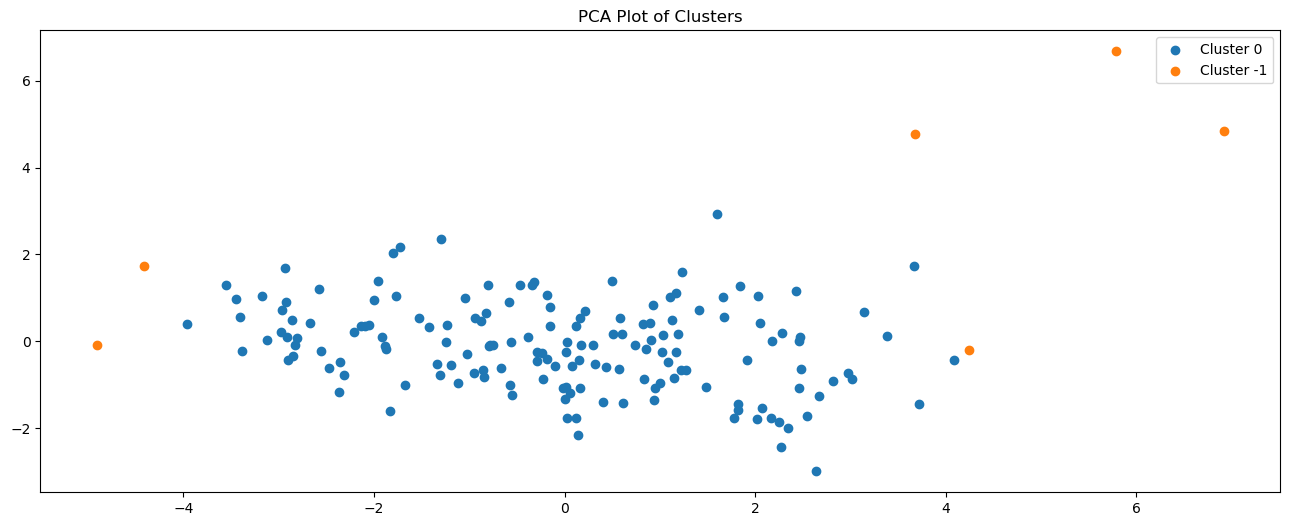

In [67]:
fig = plt.figure(figsize=(16, 6))
for cluster in set(clusters):
    cluster_points = pca_data[clusters == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')

plt.title('PCA Plot of Clusters')
plt.legend()
plt.show()

### We try with various min_sample values DBSCAN Fails here to make good clusters due to high density of datapoints at particular position.

### Conclusion: We try various algorithms of clusters, PCA with K-Means++ with K=3 gives better results among all. So, we select that as our final model.

In [68]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
clusters=kmeans.labels_

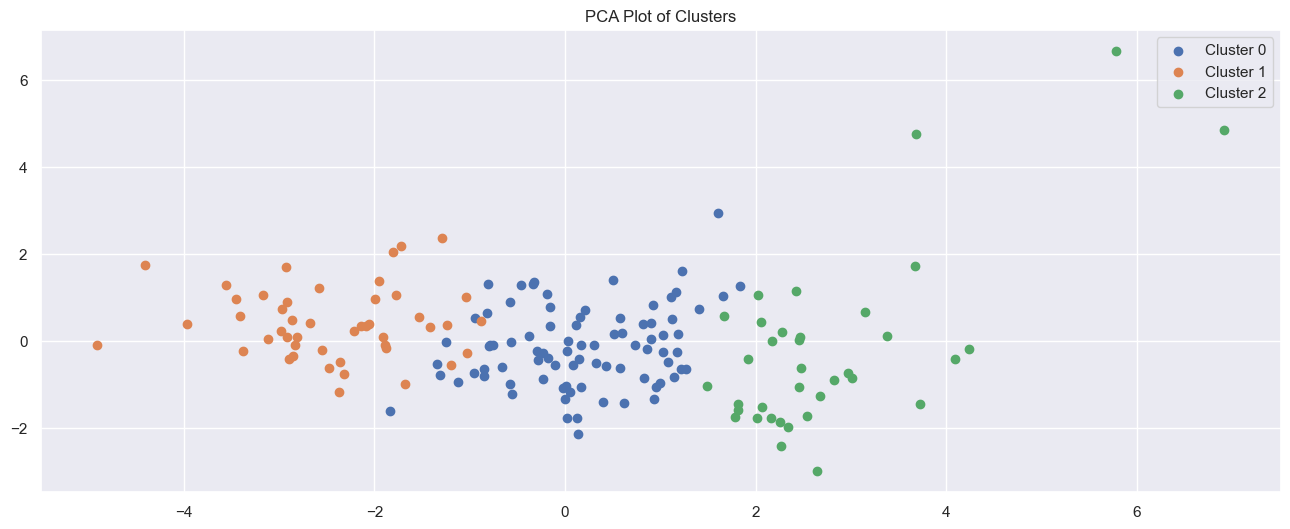

In [69]:
fig = plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
for cluster in set(clusters):
    cluster_points = pca_data[clusters == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')

plt.title('PCA Plot of Clusters')
plt.legend()
plt.show()

In [70]:
#assign cluster labels

pca_data['labels'] = clusters

pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,labels
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,1
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,0
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0


In [71]:
# Average Silhouette Score of n clusters

silhouette_avg = silhouette_score(pca_data, labels)
print("The Average silhouette Score is:", silhouette_avg)

The Average silhouette Score is: 0.5489470764218762


In [72]:
concatenated_df = pd.concat([df, pca_data],axis=1)
concatenated_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,PC6,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,1


In [73]:
final_df = concatenated_df.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], axis=1)
final_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


# Analysis of the clusters

In [74]:
cluster_means = final_df.groupby('labels').mean()
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
0,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444


### Cluster 0:-

* Highest child_mort, inflation, total_fer


* Lowest exports, imports, income, life_expec, gdpp


* Average health

### Cluster 1:- 


* Highest exports, health, imports, income, life_expec, gdpp


* Lowest child_mort, inflation, total_fer

Conclusion:- Countries belong to Cluster 1 are consider as 'Developed Countries'. 


### Cluster 2:- 

* Lowest health


* Average child_mort, exports, imports, income, inflation,  life_expec, total_fer, gdpp

## From the above analysis of clusters I conclude that:-

1) Cluster 0 consider as 'Undeveloped Countries' due to it's highest child mortality, inflation, total fertility and lowest exports, imports, income life expectancy and gdpp. 


2) Cluster 1 consider as 'Developed Countries' due to it's high exports, health, imports, income, life expectancy, gdpp and lowest child mortality, inflation, total fertility.


3) Cluster 2 consider as 'Developing Nations' due to it's lowest heath and average child mortality, exports, imports, income, inflation, life expectancy, total fertility, gdpp. 

In [75]:
final_df['labels'] = final_df['labels'].map({
    0: 'Undeveloped', 
    1: 'Developed', 
    2: 'Developing'}) 

final_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Undeveloped
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Undeveloped
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Undeveloped
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Undeveloped
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Undeveloped
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Undeveloped
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Developed


In [76]:
final_df.labels.value_counts()

Undeveloped    84
Developed      47
Developing     36
Name: labels, dtype: int64

In [77]:
85+46+36

167

<AxesSubplot:xlabel='labels', ylabel='gdpp'>

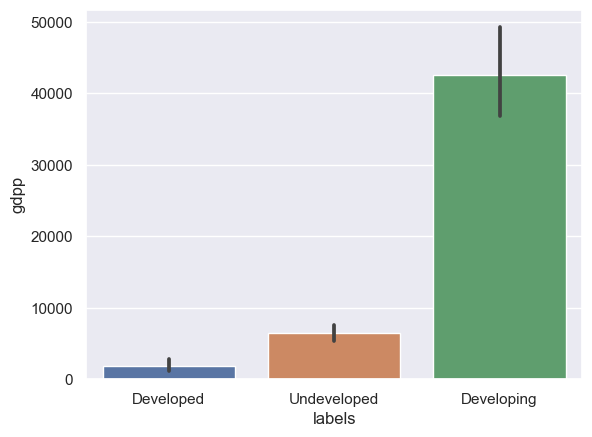

In [78]:
sns.barplot(x='labels', y='gdpp', data=final_df)

Above bar chart shows that, all the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and poor countries are having the least GDPP values.

# Analysis of Countries

In [79]:
lowsest_ggpp = final_df.nsmallest(8,'gdpp')
lowsest_ggpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,Developed
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,Developed
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,Developed
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,Developed
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,Developed
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,Developed
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,Developed
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,Developed


Above list shows all the top low GDPP countries.

In [80]:
lowset_income = final_df.nsmallest(8,'income')
lowset_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,Developed
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,Developed
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,Developed
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,Developed
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,Developed
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,Developed
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,Developed
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,Developed


Above list shows all the countries with lowest income.

In [81]:
highest_mort = final_df.nlargest(8,'child_mort')
highest_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,Developed
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,Developed
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,Developed
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,Developed
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,Developed
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,Developed
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,Developed
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Developed


Above list shows all the top countries with highest child mortality rate.

In [82]:
highest_total_fer = final_df.nlargest(8,'total_fer')
highest_total_fer

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,Developed
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,Developed
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708,Developed
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,Developed
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,Developed
149,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.50,71.1,6.23,3600,Developed
3,Angola,119.0,62.30,2.85,42.9,5900,22.40,60.1,6.16,3530,Developed
155,Uganda,81.0,17.10,9.01,28.6,1540,10.60,56.8,6.15,595,Developed


Above list shows all the top countries with highest total fertility rate.

<AxesSubplot:xlabel='gdpp', ylabel='income'>

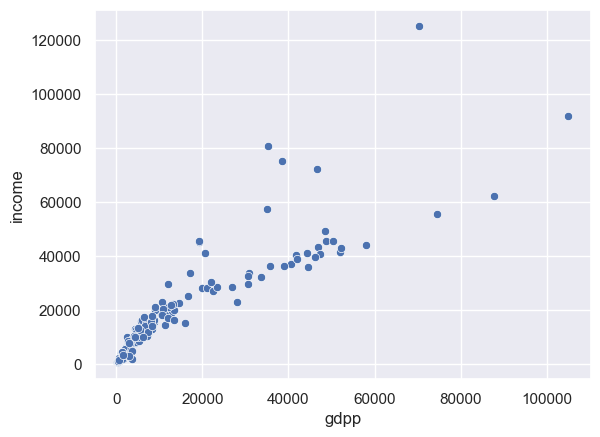

In [83]:
sns.scatterplot(x='gdpp',y='income',data=final_df)


Above scatterplot shows that countries with gdpp having high income.

In [84]:
# Filter undeveloped countries
undeveloped_data = final_df[final_df['labels'] == 'Undeveloped']

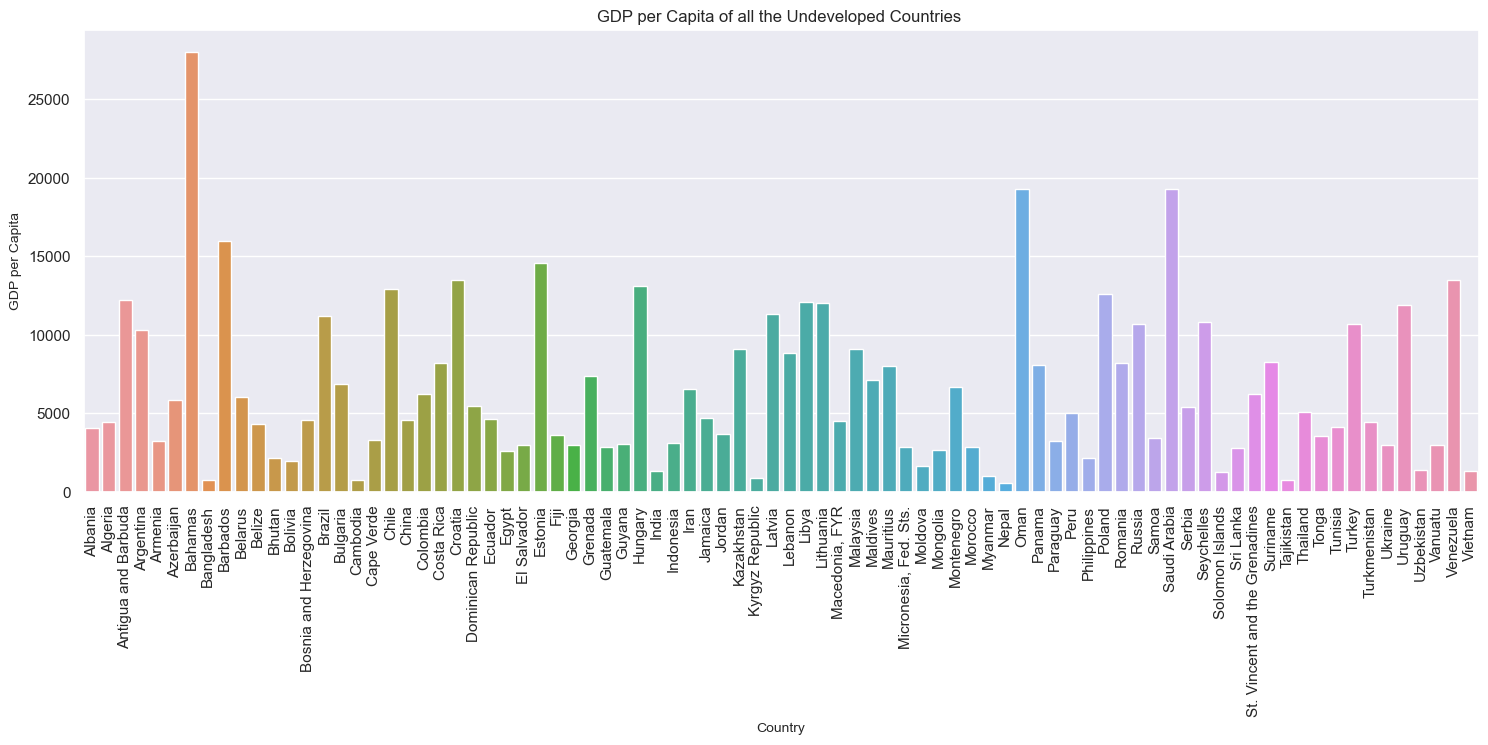

In [85]:
fig = plt.figure(figsize = (18,6))
s = sns.barplot(x = 'country', y = 'gdpp', data = undeveloped_data)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Undeveloped Countries ')
plt.show()

From the above barchart, we can see all the Under-developed countries like Burundi, Afghanistan, Nigeria, etc.

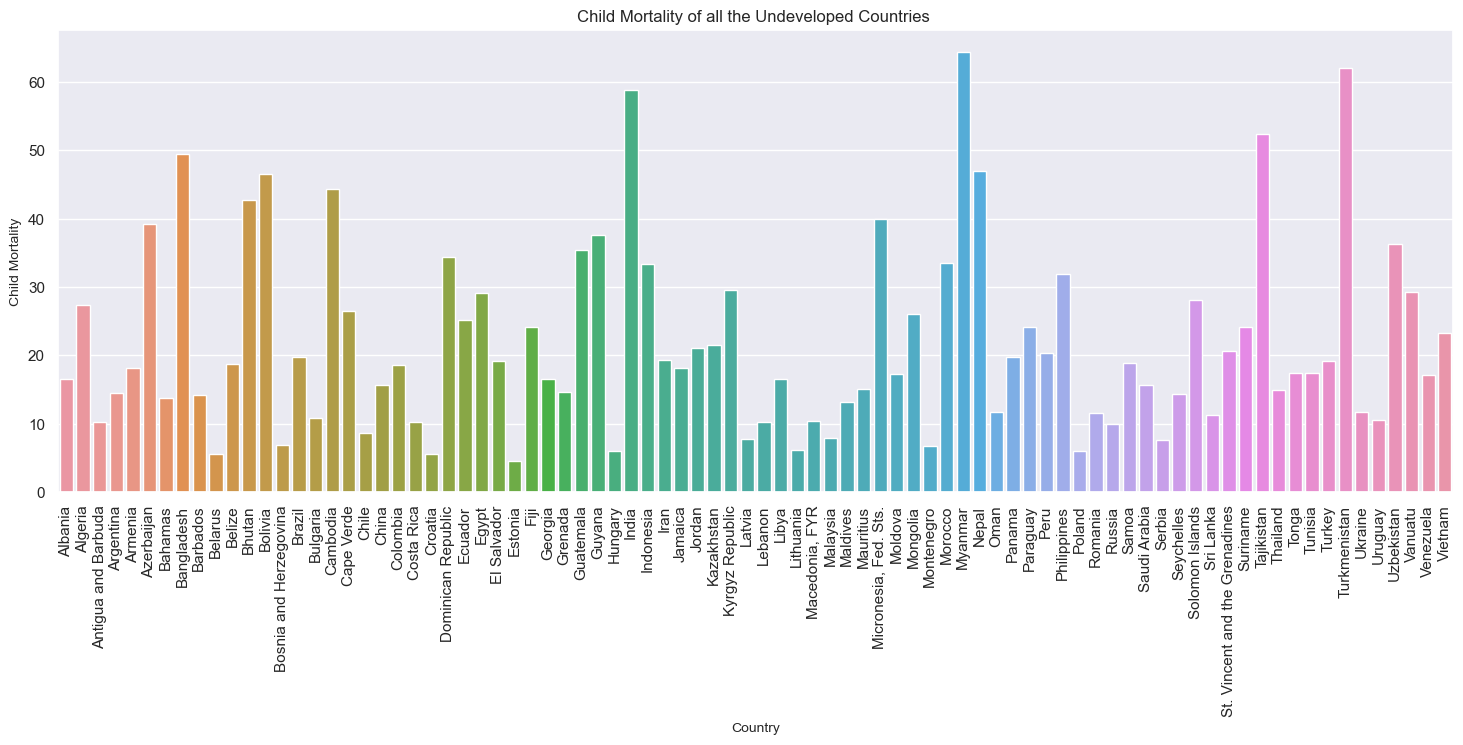

In [86]:
fig = plt.figure(figsize = (18,6))
s = sns.barplot(x = 'country', y = 'child_mort', data = undeveloped_data)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child Mortality', fontsize=10)
plt.title('Child Mortality of all the Undeveloped Countries ')
plt.show()

In [87]:
sorted_low_gdp_countries = undeveloped_data.sort_values('gdpp')['country'].tolist()
sorted_low_gdp_countries

['Nepal',
 'Tajikistan',
 'Bangladesh',
 'Cambodia',
 'Kyrgyz Republic',
 'Myanmar',
 'Solomon Islands',
 'Vietnam',
 'India',
 'Uzbekistan',
 'Moldova',
 'Bolivia',
 'Philippines',
 'Bhutan',
 'Egypt',
 'Mongolia',
 'Sri Lanka',
 'Morocco',
 'Guatemala',
 'Micronesia, Fed. Sts.',
 'Georgia',
 'Ukraine',
 'Vanuatu',
 'El Salvador',
 'Guyana',
 'Indonesia',
 'Armenia',
 'Paraguay',
 'Cape Verde',
 'Samoa',
 'Tonga',
 'Fiji',
 'Jordan',
 'Albania',
 'Tunisia',
 'Belize',
 'Turkmenistan',
 'Algeria',
 'Macedonia, FYR',
 'China',
 'Bosnia and Herzegovina',
 'Ecuador',
 'Jamaica',
 'Peru',
 'Thailand',
 'Serbia',
 'Dominican Republic',
 'Azerbaijan',
 'Belarus',
 'St. Vincent and the Grenadines',
 'Colombia',
 'Iran',
 'Montenegro',
 'Bulgaria',
 'Maldives',
 'Grenada',
 'Mauritius',
 'Panama',
 'Costa Rica',
 'Romania',
 'Suriname',
 'Lebanon',
 'Malaysia',
 'Kazakhstan',
 'Argentina',
 'Turkey',
 'Russia',
 'Seychelles',
 'Brazil',
 'Latvia',
 'Uruguay',
 'Lithuania',
 'Libya',
 'Antigua 

Above list shows the countries with lowest GDP in ascending order.

In [88]:
highest_child_mort = undeveloped_data.sort_values('child_mort', ascending = False)['country'].tolist()
highest_child_mort

['Myanmar',
 'Turkmenistan',
 'India',
 'Tajikistan',
 'Bangladesh',
 'Nepal',
 'Bolivia',
 'Cambodia',
 'Bhutan',
 'Micronesia, Fed. Sts.',
 'Azerbaijan',
 'Guyana',
 'Uzbekistan',
 'Guatemala',
 'Dominican Republic',
 'Morocco',
 'Indonesia',
 'Philippines',
 'Kyrgyz Republic',
 'Vanuatu',
 'Egypt',
 'Solomon Islands',
 'Algeria',
 'Cape Verde',
 'Mongolia',
 'Ecuador',
 'Paraguay',
 'Suriname',
 'Fiji',
 'Vietnam',
 'Kazakhstan',
 'Jordan',
 'St. Vincent and the Grenadines',
 'Peru',
 'Brazil',
 'Panama',
 'Iran',
 'El Salvador',
 'Turkey',
 'Samoa',
 'Belize',
 'Colombia',
 'Jamaica',
 'Armenia',
 'Tonga',
 'Tunisia',
 'Moldova',
 'Venezuela',
 'Albania',
 'Libya',
 'Georgia',
 'China',
 'Saudi Arabia',
 'Mauritius',
 'Thailand',
 'Grenada',
 'Argentina',
 'Seychelles',
 'Barbados',
 'Bahamas',
 'Maldives',
 'Oman',
 'Ukraine',
 'Romania',
 'Sri Lanka',
 'Bulgaria',
 'Uruguay',
 'Macedonia, FYR',
 'Antigua and Barbuda',
 'Lebanon',
 'Costa Rica',
 'Russia',
 'Chile',
 'Malaysia',
 

Above list shows the countires with high mortality rate in ascending order.

# Conclusion

* After grouping all the countries into 3 groups by using some socio-economic and health factors, we can determine the overall development of the country.


* Here, the countries are categorised into list of developed countries, developing countries and undeveloped countries.


* In Developed countries, we see that GDP per capita and income is high where as Death of children under 5 years of age per 1000 live births i.e. child-mort is very low, which is expected.


* In Developing countries and Undeveloped countries, the GDP per capita and income are low and child-mort is high. Specifically, for undeveloped countries, the death rate of children is very high.

# Recomendetions

* From bar chats, we can clearly see the socio-economic and heath situation of the under developed countries.


* In countries like Haiti, Sierra Leone,Chad, etc., the death rate of children under 5 years of age per 1000 (child-mort) is high.


* In countries like Burundi, Congo, Niger, etc., GDP per capita is very low. So, in those countries, the income per person is also low. So, these countries are considered as poor contries.


* Finally, as per categories of the countries, top 8 under-developed countries which are in direst need of aid are as below:

1) Sierra Leone


2) Mali


3) Niger


4) Nigeria


5) Haiti


6) Chad


7) Central African Republic


8) Congo, Dem. Rep.


9) Burundi


10) Guinea


11) Guinea-Bissau